In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

try:
    from ipywidgets import interact, IntSlider, fixed, FloatSlider
except ImportError:
    print u'Так надо'

## Quiz Time!

<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Выявление выбросов и аномалий</center></h2>

## В предыдущий раз..

Мы разговаривали про метод опорных векторов

* Линейный классификатор, максимизирующий ширину разделяющей полосы между объектами разных классов
* Постановки при жесткой и нежесткой границей между классами
* Kernel Trick!

<center><img src='images/kernel.png' width=700></center>

## Anomaly Detection (Выявление аномалий)

aka
* Outlier detection (выявление выбросов)
* Novelty detection (выявление новизны в данных)
* Noise detection (выявление шумов в данных)
* Deviation detection (выявление отклонений в данных)

**Аномалии** - наблюдения, которые отличаются от большинства остальных объектов и не соотносятся с ожидаемой структурой данных

Количество аномалий в данных (если они есть) *ничтожно* мало по сравнению с количеством нормальных объектов

<center><img src='images/boyfriend.png'></center>

### Игрушечный пример

<center><img src='images/toy_example.png' width=500></center>
Области $N_1$ и  $N_2$ содержат большую часть точек данных. $o_1$, $o_2$ и $O_3$ - выбросы

### Жизненные примеры
* Мошеннические действия (fraud detection)
    * несогласованные операции по кредитным картам, 
    * взлом аккаунта
* Проверка валидности (согласованности) записей базе данных
    * ошибки (подтосовки) в сборе данных
* Мониторинг стабильности систем
    * преждевременное предупреждение сбоя на производстве

### [Moscow Data Science Meetup report](https://youtu.be/o5QCVyI0dSA?t=1994)
<center><img src='images/kasper.png'></center>

### Основные вызовы
* Как определить "нормальность" и аномальность данных?
    * *"..пропорции условны, а границы размыты" (c) Геральт из Ривии*
* Эволюция понятия "нормальности"
    * Раньше было нормально за евро отдать 30 рублей...
* Адаптация мошенников
* Наличие разметки аномальных и "нормальных" наблюдений
* Зашумление в признаках

# Типы аномалий

## Точечные аномалии
* Отдельные наблюдения, отличающиеся от большенства остальных наблюдений
* Наиболее распространенный тип аномалий на практике 
<center><img src='images/toy_example.png' width=400></center>

## Контекстные (условные) аномалии
* Наблюдения выделяются в заданном контексте (при определенных условиях)
* Как задать контекст?
    * Время
    * Пространство
    * Группирующие признаки
    * ...

<center><img src='images/cont_anomaly.png' width=800></center>

## Коллективные (совокупные) аномалии
* Связанные аномальные наблюдения
* Каждое наблюдение поотдельности может не быть аномалией, но их совместное появление вызывает аномальность

<center><img src='images/coll_anomaly.png' width=800></center>

Так или иначе можно попытаться трансформировать проблемы выявления аномалий одного типа в другой (например, добавить контекст)

# Подходы к решению
* **Обучение без учителя** 
    * Меток нет
    * Используется некоторое представление о том, что такое аномалия
* **Частичное обучение** 
    * Известны только метки "нормальных" данных
* **Обучение с учителем**
    * Известны метки "нормальных" и аномальных данных
    
    
    
### Ответы алгоритмов
* Скор аномальности
* Метка аномальности


# Обучение без учителя

## Методы, основанные на кластеризации

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

In [5]:
def make_toy_outlier(n_samples = 300, outliers_fraction = 0.15):
    
    n_outliers = int(outliers_fraction * n_samples)
    n_inliers = n_samples - n_outliers

    np.random.seed(0)

    X = make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3],
                   random_state=0, n_samples=n_inliers, n_features=2)[0]
    outliers = np.random.uniform(low=-6, high=6,
                                 size=(n_outliers, 2))

    
    return X, outliers

def dbscan_demo(eps, minPts):
    X, outliers = make_toy_outlier(n_samples = 300, outliers_fraction = 0.15)
    X = np.r_[X, outliers]
    
    model = DBSCAN(eps=eps, min_samples=minPts)
    model.fit(X)
    
    labels = model.labels_
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.scatter(outliers[:, 0], outliers[:, 1], edgecolors='k', s=200, facecolors='none', linewidths=2)
    plt.axis('equal')
    plt.show()

**Предположение 1**: "Нормальные" наблюдения принадлежат некоторому кластеру, а аномальные - нет
* DBSCAN
* OPTICS
* ...

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family [u'Verdana'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


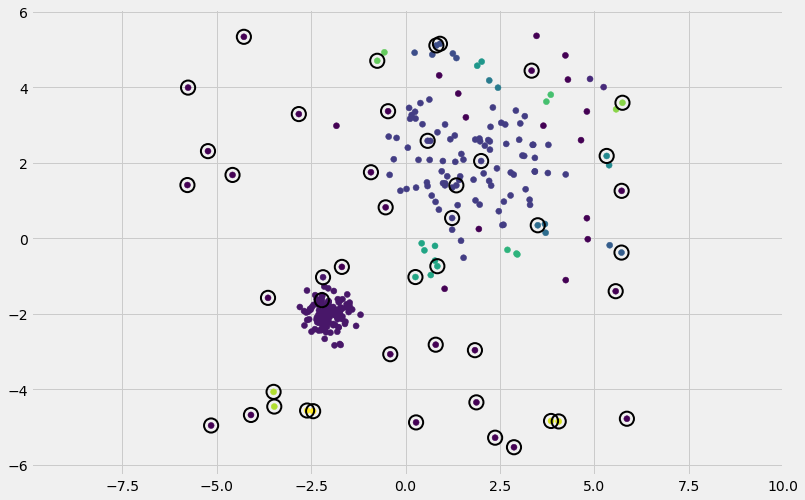

<function __main__.dbscan_demo>

In [6]:
interact(dbscan_demo, eps=FloatSlider(min=0.5, max=2.0, step=0.1), minPts=IntSlider(min=2, max=10, step=1))

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

def demo_kmeans(k=3, dist_type=['abs', 'rel']):
    X, outliers = make_toy_outlier(n_samples = 300, outliers_fraction = 0.15)
    X = np.r_[X, outliers]
    
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(X)
    centers = model.cluster_centers_
    labels = model.labels_
    
    d = np.sqrt(((X - centers[labels])**2).sum(axis=1))
    
    if dist_type == 'rel':
        for c in labels:
            d[labels==c] = d[labels==c]/np.median(d[labels==c])    
        
    sc = plt.scatter(X[:, 0], X[:, 1], c=d)
    plt.scatter(outliers[:, 0], outliers[:, 1], edgecolors='k', s=200, facecolors='none', linewidths=2)
    plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=300)
    plt.axis('equal')
    plt.colorbar(sc)
    plt.show()

**Предположение 2**: "Нормальные" наблюдения расплолжены близко к центрам кластеров, а аномалии - далеко
* Посчитать (относительное) расстояние до центройдов
$$ d_{rel}(x_i, \mu_{C_j}) = \frac{d(x_i, \mu_{C_j})}{median([d(x, \mu_{C_j}) \ \forall x \in C_j])}, \quad x_i \in C_j$$
* После кластеризации итеративно удалять объекты, которые сильнее всего портят критерий алгоритма
* Удалять далекие (??) кластеры
* ...

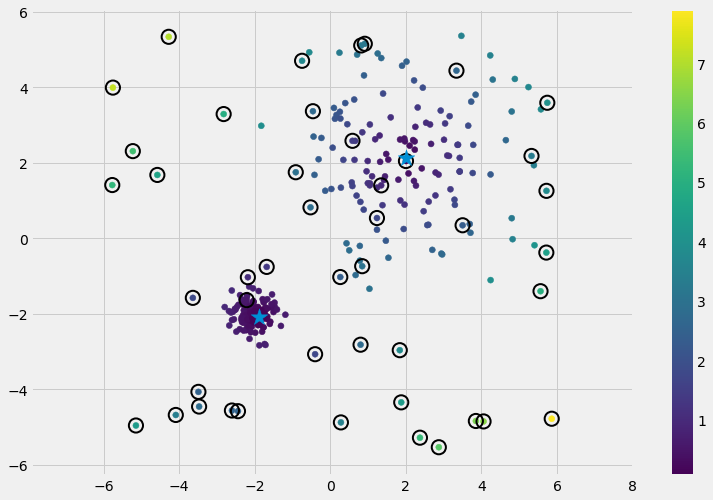

<function __main__.demo_kmeans>

In [8]:
interact(demo_kmeans, dist_type=['abs', 'rel'], k=IntSlider(min=2, max=10, step=1))

**Предположение 3**: "Нормальные" наблюдения принадлежат большим или плотным кластерам, а аномалии к мелким или разреженым
* Выполнить кластеризацию
* На ее основе посчитать некоторый скор аномальности

**Сluster-Based Local Outlier Factor**
* Пусть $|C_1|\geq|C_2|\geq|C_3|\dots\geq|C_K|,\ \sum\limits_i|C_i| = N$
* Задаем параметры $\alpha$ и $\beta$
* На их основе определям группы большых (LC) и маленьких (SC) кластеров:
    * $\sum\limits_{i=1}^b|C_i| \geq N*\alpha$
    * $|C_b|\bigm/|C_{b+1}| \geq \beta$
* Пусть $x_i \in C_j$
* Eсли $ C_j \in \text{SC}$: $CBLOF(x_i) = |C_j| \cdot \min\limits_{C_k \in LC} d(x_i, C_k) $
* Eсли $ C_j \in \text{LC}$: $CBLOF(x_i) = |C_j| \cdot d(x_i, C_j) $

**Плюсы**
* Скорость работы (в некоторых случаях)
* Можно выявлять целые кластеры аномалий

**Минусы**
* Надо как-то определять параметры эвристик и алгоритмов кластеризации
* Выбросы изначально влияют на формирование кластеров

## Методы, основанные на плотности и расстоянии

In [9]:
from sklearn.neighbors import NearestNeighbors

def demo_knn(k=3, density=False):
    X, outliers = make_toy_outlier(n_samples = 300, outliers_fraction = 0.15)
    X = np.r_[X, outliers]
    
    model = NearestNeighbors(n_neighbors=k)
    model.fit(X)
        
    d, _ = model.kneighbors(X, k+1, return_distance=True)
    if density:
        d = 1.0/np.mean(d[:, 1:], axis=1)
    else:
        d = d[:, -1]
            
    sc = plt.scatter(X[:, 0], X[:, 1], c=d)
    plt.scatter(outliers[:, 0], outliers[:, 1], edgecolors='k', s=200, facecolors='none', linewidths=2)
    plt.axis('equal')
    plt.colorbar(sc)
    plt.show()

**Предположение 1**: Аномальные объекты расположены далеко от остальных объектов
* Считаем расстояние до k-го ближайшего соседа

**Предположение 2**: Аномальные объекты расположены в разреженых областях
* Считаем плотность аналогично DBSCAN или как обратное от среднего расстояние до $k$ ближайших соседей:
$$ density_k(a) = 1 \Biggm/ \left(\frac{\sum\limits_{b\in N_k(a)} d(a, b)}{|N_k(a)|} \right)$$
    * Когда это не взлетит?

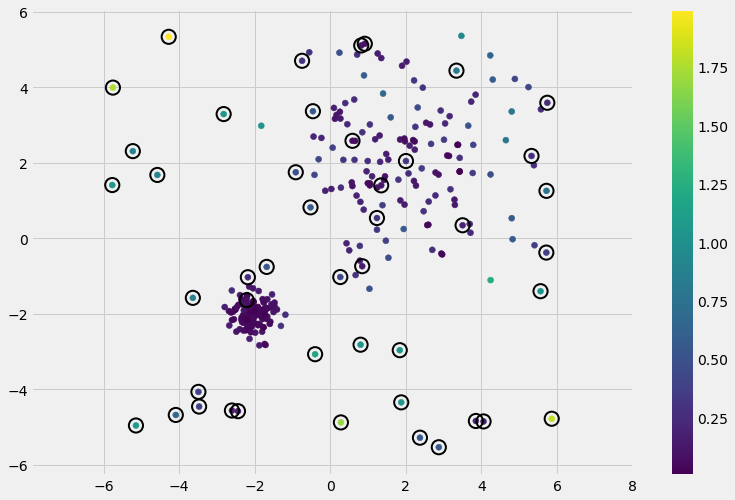

<function __main__.demo_knn>

In [10]:
interact(demo_knn, k=IntSlider(min=1, max=20, step=1))

### Local Outlier Factor
* Идея: давайте сравнивать плотность объектов с плотностями их $k$ ближайших соседей
* Чтобы повысить стабильность в условии разной плотности будет считать reachability-distance:
$$ \text{reachability-distance}_k(a, b) = \max\left(k-\text{distance}(a), d(a,b) \right)$$
<center><img src='images/reach-dist.png' width=300></center>
* Считаем плотность - local reachability density:
$$ lrd(a) = 1 \Biggm/ \left(\frac{\sum\limits_{b\in N_k(a)} \text{reachability-distance}_k(a, b)}{|N_k(a)|} \right)$$
* Сравнивам с соседями:
$$LOF_k(a) = \frac{1}{|N_k(a)|}\sum\limits_{b\in N_k(a)}\frac{lrd(b)}{lrd(a)}$$

In [11]:
from sklearn.neighbors import LocalOutlierFactor

def demo_lof(k=3, contour=False):
    X, outliers = make_toy_outlier(n_samples = 300, outliers_fraction = 0.15)
    X = np.r_[X, outliers]
    
    model = LocalOutlierFactor(n_neighbors=k)
    model.fit(X)
        
    lof = abs(model._decision_function(X))
    if contour:
        xx, yy = np.meshgrid(np.linspace(-6, 6, 500), np.linspace(-6, 6, 500))
        Z = abs(model._decision_function(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)
        cont = plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r, alpha=0.4)
            
    sc = plt.scatter(X[:, 0], X[:, 1], c=lof)
    plt.scatter(outliers[:, 0], outliers[:, 1], edgecolors='k', s=200, facecolors='none', linewidths=2)
    plt.axis('equal')
    if contour:
        plt.colorbar(cont)
    else:
        plt.colorbar(sc)
    plt.show()

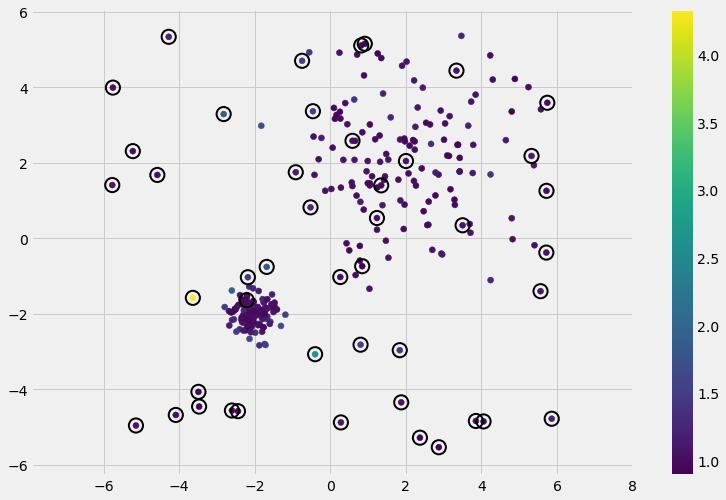

<function __main__.demo_lof>

In [12]:
interact(demo_lof, k=IntSlider(min=5, max=30, step=1))

**Плюсы**
* Никаких предположений о природе и распределениях в данных

**Минусы**
* Скорость работы (можно попытаться ускорить)
* Определение адекватной меры близости между объектами

## Статистические методы

**Предположение**: Нормальные объекты порождены некоторым распределением, а аномальные - нет
* Обучаем на данных параметры распределения - смотрим мна вероятности
<center><img src='images/gauss.png' width=400></center>

**Плюсы**
* Если предположение верно, то в нашем арсенале есть всякие статистические аргументы (значимость, доверительные интервалы и тп)

**Минусы**
* Выбросы могут влиять на результат обучения - нужны робастные методы
* Выбор закона распределения

## Методы машинного обучения

### Изолирующий лес
**Предположение**: Аномальные объекты быстрее изолируются от остальных наблюдений в данных
<center><img src='images/isofor.png' width=600></center>

Каждое дерево в изолирующем лесу строится по следующим правилам:
* Дерево строится на случайной подвыборке заданного размера
* В каждой вершине выбирается случайный признак и случайный порог
* Дерево строится до максимальной глубины

Авторы рекомендуют использовать 256 объектов для обучения каждого дерева и 100 деревьев в лесу

Мера аномальности - средняя длина пути по деревьям лесу*
<center><img src='images/isofor2.png' width=400></center>

* Изолирующее дерево похоже на дерево бинарного поиска (ДБП). 
* Изоляция объекта равносильна неудачному поиску по ДБП

Нормализованный скор аномальности:
* $n$ - количество элементов, по которому строилось дерево
* $h(x)$ - длина пути по изолирующему дереву для объекта $x$
* $E(h(x))$ - средняя длина по всем деревьям в лесу
* $c(n) = 2H(n-1) - (2(n-1)/n)$ - средняя длина неудачных поисков в ДБП (deal with it)

$$ s(x,n) = 2^{-\frac{E(h(x))}{c(n)}} $$

In [13]:
from sklearn.ensemble import IsolationForest

def demo_iso(trees=50, samples=256, contour=False):
    X, outliers = make_toy_outlier(n_samples = 300, outliers_fraction = 0.15)
    X = np.r_[X, outliers]
    
    model = IsolationForest(n_estimators=trees, max_samples=samples, random_state=0)
    model.fit(X)
        
    score = model.decision_function(X)
    if contour:
        xx, yy = np.meshgrid(np.linspace(-6, 6, 500), np.linspace(-6, 6, 500))
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cont = plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r, alpha=0.4)
            
    sc = plt.scatter(X[:, 0], X[:, 1], c=score)
    plt.scatter(outliers[:, 0], outliers[:, 1], edgecolors='k', s=200, facecolors='none', linewidths=2)
    plt.axis('equal')
    if contour:
        plt.colorbar(cont)
    else:
        plt.colorbar(sc)
    plt.show()

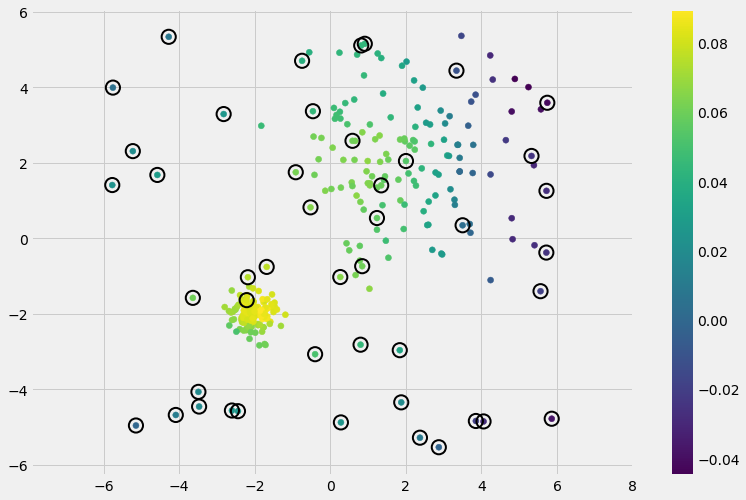

<function __main__.demo_iso>

In [14]:
interact(demo_iso, trees=IntSlider(min=50, max=200, step=25), samples=IntSlider(min=10, max=300, step=10))

**Плюсы**
* Скорость обучения и предсказания
* Небольшие затраты по памяти

**Минусы**
* ...

# Методы обучения с учителем
* Решается обычная задача классификации (нормальный объект/аномалия)
* **Ключевая особенность**: сильный дисбаланс классов

## Способы балансировки классов
* Взвешивание функции потерь
$$ \tilde{L}(X, \theta) = \sum_iw_iL(x_i, \theta) $$
Обычно $w_i$ обратно пропорциональны частоте соответствующего класса

In [15]:
from sklearn.datasets import make_moons
from imblearn.datasets import make_imbalance
from sklearn.linear_model import LogisticRegression

def demo_weight(class_weight=None, ratio=0.5):

    X_, y_ = make_moons(n_samples=500, shuffle=True, noise=0.3, random_state=0)
    X, y = make_imbalance(X_, y_, ratio, random_state=0)

    model = LogisticRegression(class_weight=class_weight).fit(X, y)
    x0, x1 = np.meshgrid(np.linspace(-1, 2.5, 100),
                         np.linspace(-2, 2, 100))
    xx0, xx1 = x0.ravel(), x1.ravel()

    X_grid = np.c_[xx0, xx1]

    y_hat = model.decision_function(X_grid)
    y_hat = y_hat.reshape(x0.shape)

    plt.contour(x0, x1, y_hat, levels=[0])
    plt.scatter(X[:,0], 
                X[:, 1], 
                c=y, cmap=plt.cm.flag_r)
    plt.axis('equal')

ImportError: No module named imblearn.datasets

In [16]:
interact(demo_weight, class_weight=['balanced', None], ratio=FloatSlider(min=0.05, max=0.5, step=0.05))

NameError: name 'demo_weight' is not defined

## Способы балансировки классов
### Сэмплирование
* Under-sampling
* Over-sampling
* Ensemble methods

See  [imbalanced-learn](https://github.com/scikit-learn-contrib/imbalanced-learn)

## Under-sampling
Убираем представителей доминирующего класса
* Случайным образом
* Оставить эталонные объекты (ClusterCentroids)
* Оставить объекты, наиболее похожие на представителей минорного класса (NearMiss)
* Удалить объекты, в окрестности которых есть (много) представителей минорного класса (Edited NN, Condenced NN)

In [17]:
from imblearn.under_sampling import NearMiss, RandomUnderSampler, EditedNearestNeighbours, ClusterCentroids, CondensedNearestNeighbour

def demo_under(ratio=0.5, sampler=None):

    X_, y_ = make_moons(n_samples=500, shuffle=True, noise=0.3, random_state=0)
    X, y = make_imbalance(X_, y_, ratio, random_state=0)
    
    sampler_model = \
              {'rand': RandomUnderSampler(random_state=0),
               'cluster': ClusterCentroids(random_state=0),
               'editnn': EditedNearestNeighbours(random_state=0),
               'condnn': CondensedNearestNeighbour(random_state=0),
               'nearmiss': NearMiss(random_state=0, version=2)}.get(sampler)
    
    if sampler:
        X, y = sampler_model.fit_sample(X, y)

    model = LogisticRegression(class_weight=None).fit(X, y)
    x0, x1 = np.meshgrid(np.linspace(-1, 2.5, 100),
                         np.linspace(-2, 2, 100))
    xx0, xx1 = x0.ravel(), x1.ravel()

    X_grid = np.c_[xx0, xx1]

    y_hat = model.decision_function(X_grid)
    y_hat = y_hat.reshape(x0.shape)

    plt.contour(x0, x1, y_hat, levels=[0])
    plt.scatter(X[:,0], 
                X[:, 1], 
                c=y, cmap=plt.cm.flag_r)
    plt.axis('equal')

ImportError: No module named imblearn.under_sampling

In [18]:
interact(demo_under, ratio=FloatSlider(min=0.05, max=0.5, step=0.05), sampler=[None, 'rand', 'cluster', 'editnn', 'condnn', 'nearmiss'])

NameError: name 'demo_under' is not defined

## Over sampling
Генерируем представителей минорного класса
* Случайным образом из существующих
* Синтетически, на основе существующих


## SMOTE
### Synthetic Minority Over-sampling Technique
* Для каждого представителя минорного класса найте $k$ ближайших соседей
* Выбрать одного из соседей
* Сгенерировать новый объект, расположеный между ними

<center><img src='images/smote.png' width=400></center>

In [19]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

def demo_over(ratio=0.5, sampler=None):

    X_, y_ = make_moons(n_samples=500, shuffle=True, noise=0.3, random_state=0)
    X, y = make_imbalance(X_, y_, ratio, random_state=0)
    
    sampler_model = \
              {'rand': RandomOverSampler(random_state=0),
               'smote': SMOTE(),
               }.get(sampler)
    
    if sampler:
        X, y = sampler_model.fit_sample(X, y)

    model = LogisticRegression(class_weight=None).fit(X, y)
    x0, x1 = np.meshgrid(np.linspace(-1, 2.5, 100),
                         np.linspace(-2, 2, 100))
    xx0, xx1 = x0.ravel(), x1.ravel()

    X_grid = np.c_[xx0, xx1]

    y_hat = model.decision_function(X_grid)
    y_hat = y_hat.reshape(x0.shape)

    plt.contour(x0, x1, y_hat, levels=[0])
    plt.scatter(X[:,0], 
                X[:, 1], 
                c=y, cmap=plt.cm.flag_r)
    plt.axis('equal')

ImportError: No module named imblearn.over_sampling

In [20]:
interact(demo_over, ratio=FloatSlider(min=0.05, max=0.5, step=0.05), sampler=[None, 'rand', 'smote'])

NameError: name 'demo_over' is not defined

## Ансамблевые методы
### Easy Ensemble

* Подход, похожий на бэггинг
* Но всмето простого сэмплирования с возвратом делаем случайной сбалансированное сэмплирование

# Методы частичного обучения
## One-class SVM

### Две постановки задачи

* **Support Vector Data Description**:
Хотим загнать наши данные в сферу радиуса $R$ c центром в точке $a$
$$
\begin{cases} 
   R^2 + C\sum\limits_i\xi_i  \rightarrow \min\limits_{R,a,\xi} \\
   \|\psi(x^{(i)}) - a\|^2 \leq R^2 + \xi_i \quad i=1\dots n \\
   \xi_i \geq 0 \quad i=1\dots n
\end{cases}
$$

<center><img src='images/svmdescr.jpg' width=400></center>

* **One Class SVM**: Хотим отделить данные в пространстве $H=\psi{(X)}$ от начала координат
$$
\begin{cases} 
  \frac{1}{2} ||w||^2 + C\sum\limits_i\xi_i - \rho \rightarrow \min\limits_{w,\rho,\xi} \\
   (\langle w, \psi(x^{(i)}) \rangle) \geq \rho -\xi_i \quad i=1\dots n \\
   \xi_i \geq 0 \quad i=1\dots n
\end{cases}
$$

<center><img src='images/ocsvm.png' width=400></center>

Оказываются эквивалентны, если $k(u, v)$ - RBF ядро =\


In [21]:
from sklearn.svm import OneClassSVM

def demo_ocsvm(gamma=0.2, contour=False):
    X, outliers = make_toy_outlier(n_samples = 300, outliers_fraction = 0.15)
    X = np.r_[X, outliers]
    
    model = OneClassSVM(gamma=gamma)
    model.fit(X)
        
    score = model.decision_function(X)[:,0]
    if contour:
        xx, yy = np.meshgrid(np.linspace(-6, 6, 500), np.linspace(-6, 6, 500))
        Z = model._decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cont = plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r, alpha=0.4)
            
    sc = plt.scatter(X[:, 0], X[:, 1], c=score)
    plt.scatter(outliers[:, 0], outliers[:, 1], edgecolors='k', s=200, facecolors='none', linewidths=2)
    plt.axis('equal')
    if contour:
        plt.colorbar(cont)
    else:
        plt.colorbar(sc)
    plt.show()

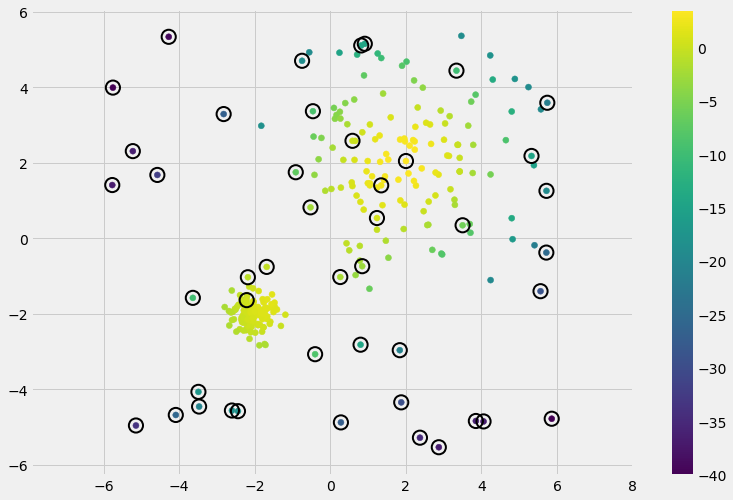

<function __main__.demo_ocsvm>

In [22]:
interact(demo_ocsvm, gamma=FloatSlider(min=0.1, max=2, step=0.05))

## Вопросы?

## Оставьте, пожалуйста, свой отзыв